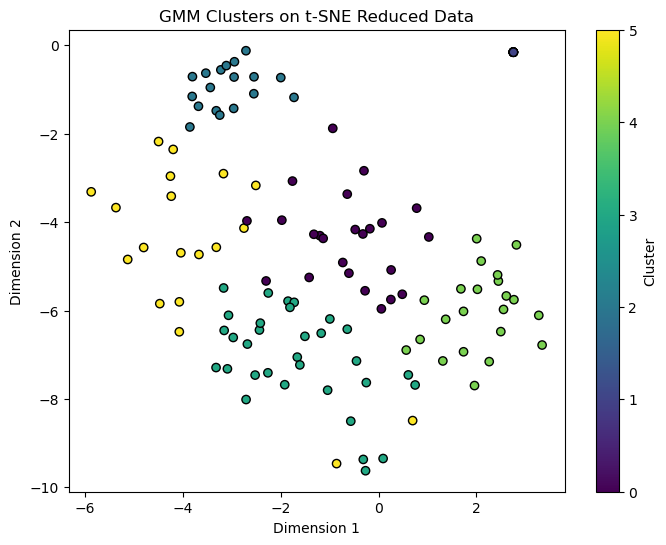

GMM Cluster
3    32
0    24
4    22
5    19
2    18
1     9
Name: count, dtype: int64


In [10]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


import pandas as pd

mfcc_tsne_df = pd.read_csv('MFCCtsnePCA.csv')
mfcc_df = pd.read_csv('MFCC_Meaned_20.csv')

song_names = mfcc_tsne_df['Song']  # Save the 'Song' column
mfcc_tsne_df = mfcc_tsne_df.drop(columns=['Song'])  # Use only the MFCC coefficients for PCA and t-SNE



# Assuming mfcc_df is your DataFrame with 115 songs and 20 MFCC coefficients
gmm = GaussianMixture(n_components=6, random_state=42)  # Use 6 components based on your categories
gmm_labels = gmm.fit_predict(mfcc_df)

# Add GMM labels to the DataFrame for analysis
mfcc_df['GMM Cluster'] = gmm_labels

# Visualizing GMM clusters (you can use t-SNE/PCA results here too)
plt.figure(figsize=(8, 6))
plt.scatter(mfcc_tsne_df['Dimension 1'], mfcc_tsne_df['Dimension 2'], c=gmm_labels, cmap='viridis', edgecolor='k')
plt.title('GMM Clusters on t-SNE Reduced Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

mfcc_tsne_df['GMM Cluster'] = gmm_labels

mfcc_tsne_df['Song'] = song_names  # Add the 'Song' column back to the t-SNE results
mfcc_tsne_df.to_csv('Output_GMM.csv')


# Optional: Print cluster assignment
print(mfcc_df['GMM Cluster'].value_counts())
